## Packages

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
r = requests.get('http://swapi.dev/api/')

r.json()

{'people': 'https://swapi.dev/api/people/',
 'planets': 'https://swapi.dev/api/planets/',
 'films': 'https://swapi.dev/api/films/',
 'species': 'https://swapi.dev/api/species/',
 'vehicles': 'https://swapi.dev/api/vehicles/',
 'starships': 'https://swapi.dev/api/starships/'}

Get Full Data of a type (people, planets, vehicles...)

In [12]:
def get_full_type_data(base_url):
    
    '''
    It allow to scrape all data from url_api
    
    '''
    #connection to api
    data =  requests.get(base_url)
    
    all_data = []
    
    data_num = 0
    
    for i in range(200):
    
        if data_num < data.json()['count']+1: #Unitil the number of data jsonfile
            
            trial=requests.get(base_url+str(i)) # Trying to connect to url
            
            if str(trial) != '<Response [404]>': # if connection is well established
                
                all_data.append(trial.json()) #trial.json() is a dictionnary
                
                data_num+=1
    
    all_data = pd.json_normalize(all_data) #After extracting all data in url_api and we normalise them
    
    return all_data

PEOPLE

In [3]:
peoples = requests.get('https://swapi.dev/api/people/').json()

In [4]:
print("Number of people in starwars is:",peoples['count'])

Number of people in starwars is: 82


In [18]:
people = get_full_type_data('https://swapi.dev/api/people/')

In [19]:
people.shape

(82, 16)

In [26]:
people.head(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/


In [28]:
people.to_csv("people.csv",index=False) # Save data, so do not need to fetch data a second time

In [6]:
#Next time, just run this

people = pd.read_csv("people.csv")

In [7]:
people.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles',
       'starships', 'created', 'edited', 'url'],
      dtype='object')

In [8]:
# Featuring

#number of film that the character palyed
people['film_num']=people['films'].apply(lambda x:len(x))

#number of vehicles used by the character
people['vehicles_num']=people['vehicles'].apply(lambda x:len(x))

#number of starships that the character flied
people['starships_num']=people['starships'].apply(lambda x:len(x))

#replace 'unknown' by NaN 
people=people.replace('unknown',np.NaN)

#replace ',' by '.' in mass variable
people['mass']=people['mass'].apply(lambda x: str(x).replace(',','.'))

#changing data type to float
people[['mass','height']]=people[['mass','height']].astype('float')

#creating 'bmi' variable to have an idea about healthy of peoples
people['bmi']=people['mass']/(people['height']/100)**2

#Getting the statistics descriptives
people.describe()

,height,mass,film_num,vehicles_num,starships_num,bmi
count,81.000000,59.000000,82.000000,82.000000,82.000000,59.000000
mean,174.604938,74.317932,67.170732,7.756098,15.804878,24.483117
std,34.774157,30.566597,44.370996,15.673805,32.048743,7.506952
min,66.000000,1.358000,34.000000,2.000000,2.000000,0.443429
25%,167.000000,55.000000,34.000000,2.000000,2.000000,21.196660
50%,180.000000,79.000000,34.000000,2.000000,2.000000,24.464602
75%,191.000000,84.000000,102.000000,2.000000,2.000000,26.342474
max,264.000000,159.000000,204.000000,76.000000,195.000000,50.928022


In [9]:
def missing_values_table(df):
    
    '''
        Function to calcultate proportion of missed data per columns
    '''
    
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected stage_dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [10]:
missing_values_table(people)

Your selected stage_dataframe has 20 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
birth_year,39,47.6
mass,23,28.0
bmi,23,28.0
hair_color,5,6.1
gender,3,3.7
eye_color,2,2.4
height,1,1.2
skin_color,1,1.2


Person with max height

In [11]:
h_max_name=people.iloc[people['height'].idxmax()]['name'] #Getting the name of the tallest one in the dataset

h_max_value=people['height'].max() # And his value

print(f"The most taller in the sample is {h_max_name} with {h_max_value} cm")

The most taller in the sample is Yarael Poof with 264.0 cm


Person with max mass

In [12]:
mass_max_name=people.iloc[people['mass'].idxmax()]['name']

mass_max_value=people['mass'].max()

print(f"The most weighted in the sample is {mass_max_name} with {mass_max_value} kg")

The most weighted in the sample is Grievous with 159.0 kg


## Correlation in people

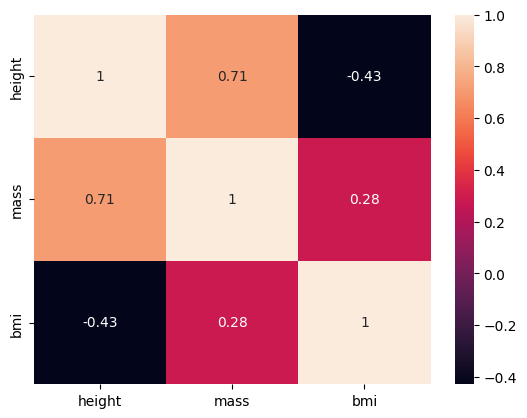

In [13]:
corr=people[['height','mass','bmi']].corr()

sns.heatmap(corr,annot=True)

plt.show()

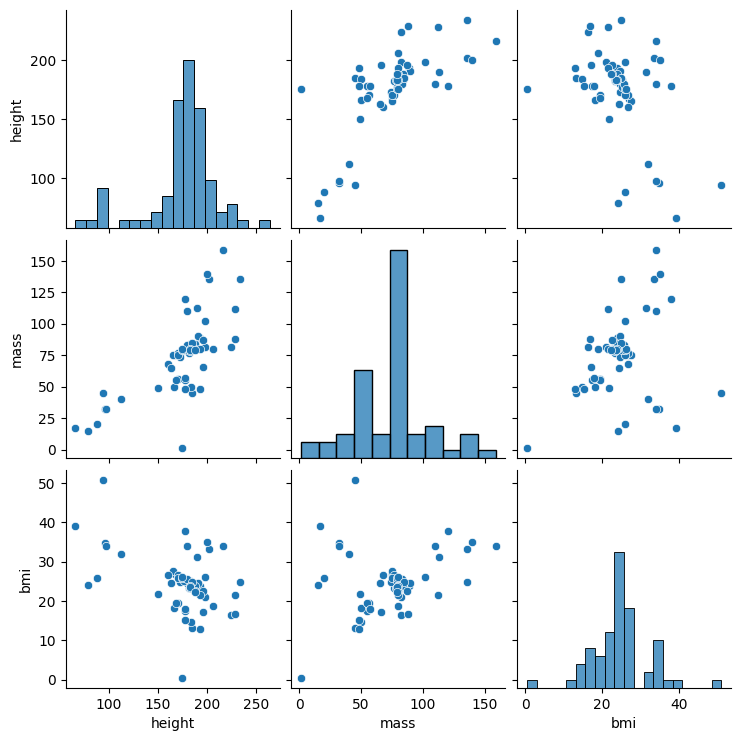

In [14]:
sns.pairplot(people[['height','mass','bmi']])

plt.show()

Looks like some of the people in starwars maybe unhealthy 

the healthy range is 18.5 to 24.9.

In [15]:
def health_type(x):
    
    '''
    Function to create a categorical var from bmi
    
    '''
    
    if x<18.5:
        
        return 'too_thin'
    
    elif x>24.9:
        
        return 'too_fat'
    
    else:
        
        return 'healthy:)'


people['health']=people['bmi'].apply(lambda x: health_type(x))

In [16]:
#Displaying number of person category

people['health'].value_counts()

healthy:)    47
too_fat      24
too_thin     11
Name: health, dtype: int64

In [17]:
people.tail(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,...,vehicles,starships,created,edited,url,film_num,vehicles_num,starships_num,bmi,health
79,Raymus Antilles,188.0,79.0,brown,light,brown,NaN,male,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/,68,2,2,22.351743,healthy:)
80,Sly Moore,178.0,48.0,none,pale,white,NaN,female,https://swapi.dev/api/planets/60/,"['https://swapi.dev/api/films/5/', 'https://sw...",...,[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/,68,2,2,15.149602,too_thin
81,Tion Medon,206.0,80.0,none,grey,black,NaN,male,https://swapi.dev/api/planets/12/,['https://swapi.dev/api/films/6/'],...,[],[],2014-12-20T20:35:04.260000Z,2014-12-20T21:17:50.498000Z,https://swapi.dev/api/people/83/,34,2,2,18.851918,healthy:)


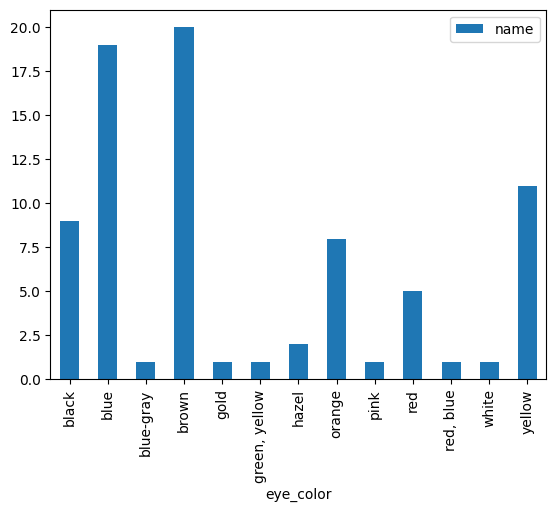

In [21]:
people[['name','eye_color']].groupby(["eye_color"]).count().plot(kind='bar') #Different eye color in data 
plt.show()

# Characters by gender

In [105]:
people[['name','gender']].groupby(["gender"]).count()

,name
gender,
female,17
hermaphrodite,1
male,60
none,1


Most of characters are male followed by women and hermaphrodite are very rare with just one person. There is none character that we didn't his gender

## PLANETS

In [108]:
planets = requests.get('http://swapi.dev/api/planets')

planets.json()

{'count': 60,
 'next': 'https://swapi.dev/api/planets/?page=2',
 'previous': None,
 'results': [{'name': 'Tatooine',
   'rotation_period': '23',
   'orbital_period': '304',
   'diameter': '10465',
   'climate': 'arid',
   'gravity': '1 standard',
   'terrain': 'desert',
   'surface_water': '1',
   'population': '200000',
   'residents': ['https://swapi.dev/api/people/1/',
    'https://swapi.dev/api/people/2/',
    'https://swapi.dev/api/people/4/',
    'https://swapi.dev/api/people/6/',
    'https://swapi.dev/api/people/7/',
    'https://swapi.dev/api/people/8/',
    'https://swapi.dev/api/people/9/',
    'https://swapi.dev/api/people/11/',
    'https://swapi.dev/api/people/43/',
    'https://swapi.dev/api/people/62/'],
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/4/',
    'https://swapi.dev/api/films/5/',
    'https://swapi.dev/api/films/6/'],
   'created': '2014-12-09T13:50:49.641000Z',
   'edited': '2014-12-20T

In [122]:
planets_df = get_full_type_data('http://swapi.dev/api/planets/') #Getting data from api

print("Number of planets",planets_df.shape[0])

Number of planets 60


In [123]:
planets_df.to_csv("planets.csv",index=False) # Save data, so do not need to fetch data a second time

In [124]:
#Next time, just run this
planets_df = pd.read_csv("planets.csv")
planets_df.head(3)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"['https://swapi.dev/api/people/5/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],['https://swapi.dev/api/films/1/'],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/


In [125]:
planet_numeric_cols=['rotation_period','orbital_period','diameter','surface_water','population']

planets_df=planets_df.replace('unknown',np.NaN)

planets_df[planet_numeric_cols] = planets_df[planet_numeric_cols].astype('float')

In [126]:
missing_values_table(planets_df)

Your selected stage_dataframe has 14 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
surface_water,34,56.7
population,17,28.3
diameter,16,26.7
gravity,16,26.7
rotation_period,12,20.0
orbital_period,12,20.0
climate,12,20.0
terrain,7,11.7
name,1,1.7


In [127]:
planets_df.head(3)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23.0,304.0,10465.0,arid,1 standard,desert,1.0,2.000000e+05,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,"['https://swapi.dev/api/people/5/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24.0,4818.0,10200.0,"temperate, tropical",1 standard,"jungle, rainforests",8.0,1.000000e+03,[],['https://swapi.dev/api/films/1/'],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/


In [128]:
planets_df[planet_numeric_cols].describe()

,rotation_period,orbital_period,diameter,surface_water,population
count,48.000000,48.000000,44.000000,26.000000,4.300000e+01
mean,25.958333,577.625000,12388.340909,36.765385,3.980003e+10
std,11.185017,953.304904,17045.948720,38.831832,1.685799e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,22.750000,310.250000,7812.250000,5.000000,1.050000e+07
50%,25.000000,374.500000,11015.000000,16.000000,5.000000e+08
75%,27.000000,412.000000,13422.500000,67.500000,3.750000e+09
max,87.000000,5110.000000,118000.000000,100.000000,1.000000e+12


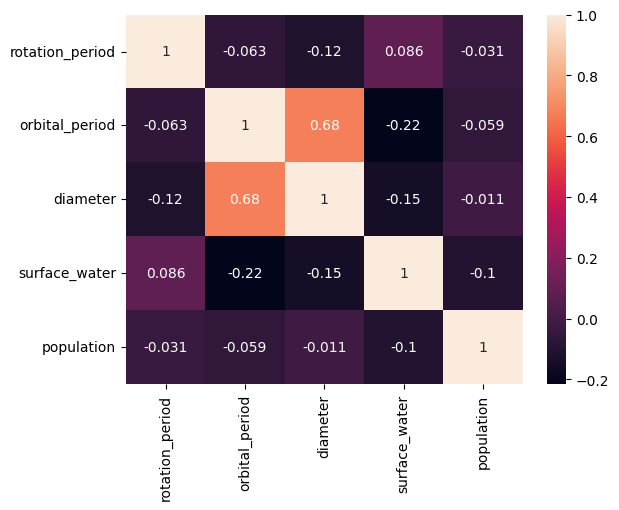

In [132]:
corr_planet=planets_df[planet_numeric_cols].corr()

sns.heatmap(corr_planet,annot=True)
plt.show()

Just diameter and orbital period are strongly correlated

In [135]:
planets_df['climate'].nunique() # Number of climate observed on all planets

20

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x=planets_df['climate'],order=planets_df.climate.value_counts().iloc[:5].index)
plt.show()

NameError: name 'planets_df' is not defined

Films

In [137]:
films = get_full_type_data('http://swapi.dev/api/films/') # To have data structure

print("Number of films",films.shape[0])

Number of films 6


In [142]:
films.to_csv("films.csv",index=False)# Save data, so do not need to fetch data a second time

In [139]:
#Next time, just run this

films = pd.read_csv("films.csv")

In [140]:
films.head(3)

,Unnamed: 0,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,created,edited,url
0,0,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/2/', 'https:...","['https://swapi.dev/api/vehicles/4/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",2014-12-10T14:23:31.880000Z,2014-12-20T19:49:45.256000Z,https://swapi.dev/api/films/1/
1,1,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/4/', 'https://...","['https://swapi.dev/api/starships/3/', 'https:...","['https://swapi.dev/api/vehicles/8/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",2014-12-12T11:26:24.656000Z,2014-12-15T13:07:53.386000Z,https://swapi.dev/api/films/2/
2,2,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/2/', 'https:...","['https://swapi.dev/api/vehicles/8/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",2014-12-18T10:39:33.255000Z,2014-12-20T09:48:37.462000Z,https://swapi.dev/api/films/3/


In [141]:
films=films.drop(columns=['created','edited','url'])

films['count_characters']=films['characters'].apply(lambda x: len(x))

films['count_planets']=films['planets'].apply(lambda x: len(x))

films['count_starships']=films['starships'].apply(lambda x: len(x))

films['count_vehicles']=films['vehicles'].apply(lambda x: len(x))

films['count_species']=films['species'].apply(lambda x: len(x))

films

,Unnamed: 0,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,count_characters,count_planets,count_starships,count_vehicles,count_species
0,0,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/2/', 'https:...","['https://swapi.dev/api/vehicles/4/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",639,108,308,148,180
1,1,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/4/', 'https://...","['https://swapi.dev/api/starships/3/', 'https:...","['https://swapi.dev/api/vehicles/8/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",571,145,350,227,180
2,2,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/2/', 'https:...","['https://swapi.dev/api/vehicles/8/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",715,180,466,303,326
3,3,The Phantom Menace,1,Turmoil has engulfed the\r\nGalactic Republic....,George Lucas,Rick McCallum,1999-05-19,"['https://swapi.dev/api/people/2/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/31/', 'https...","['https://swapi.dev/api/vehicles/33/', 'https:...","['https://swapi.dev/api/species/1/', 'https://...",1222,108,195,266,737
4,4,Attack of the Clones,2,There is unrest in the Galactic\r\nSenate. Sev...,George Lucas,Rick McCallum,2002-05-16,"['https://swapi.dev/api/people/2/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/21/', 'https...","['https://swapi.dev/api/vehicles/4/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",1436,182,351,417,515
5,5,Revenge of the Sith,3,War! The Republic is crumbling\r\nunder attack...,George Lucas,Rick McCallum,2005-05-19,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/2/', 'https:...","['https://swapi.dev/api/vehicles/33/', 'https:...","['https://swapi.dev/api/species/1/', 'https://...",1217,476,467,494,736


## Speicies

In [143]:
species_df = get_full_type_data('http://swapi.dev/api/species/') #Data insight

print("Number of films",species_df.shape[0])

Number of films 37


In [144]:
species_df.to_csv("species.csv",index=False)

In [147]:
#Next time, just run this
species_df = pd.read_csv("species.csv")

#Not useful columns
species_df=species_df.drop(columns=['created','edited','url']) # columns droping ...

In [148]:
species_df.head()

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,homeworld,language,people,films
0,Human,mammal,sentient,180,"caucasian, black, asian, hispanic","blonde, brown, black, red","brown, blue, green, hazel, grey, amber",120,https://swapi.dev/api/planets/9/,Galactic Basic,"['https://swapi.dev/api/people/66/', 'https://...","['https://swapi.dev/api/films/1/', 'https://sw..."
1,Droid,artificial,sentient,NaN,NaN,NaN,NaN,indefinite,NaN,NaN,"['https://swapi.dev/api/people/2/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw..."
2,Wookie,mammal,sentient,210,gray,"black, brown","blue, green, yellow, brown, golden, red",400,https://swapi.dev/api/planets/14/,Shyriiwook,"['https://swapi.dev/api/people/13/', 'https://...","['https://swapi.dev/api/films/1/', 'https://sw..."
3,Rodian,sentient,reptilian,170,"green, blue",NaN,black,unknown,https://swapi.dev/api/planets/23/,Galatic Basic,['https://swapi.dev/api/people/15/'],['https://swapi.dev/api/films/1/']
4,Hutt,gastropod,sentient,300,"green, brown, tan",NaN,"yellow, red",1000,https://swapi.dev/api/planets/24/,Huttese,['https://swapi.dev/api/people/16/'],"['https://swapi.dev/api/films/1/', 'https://sw..."


In [154]:
species_df=species_df.replace('unknown',np.NaN)

<AxesSubplot: >

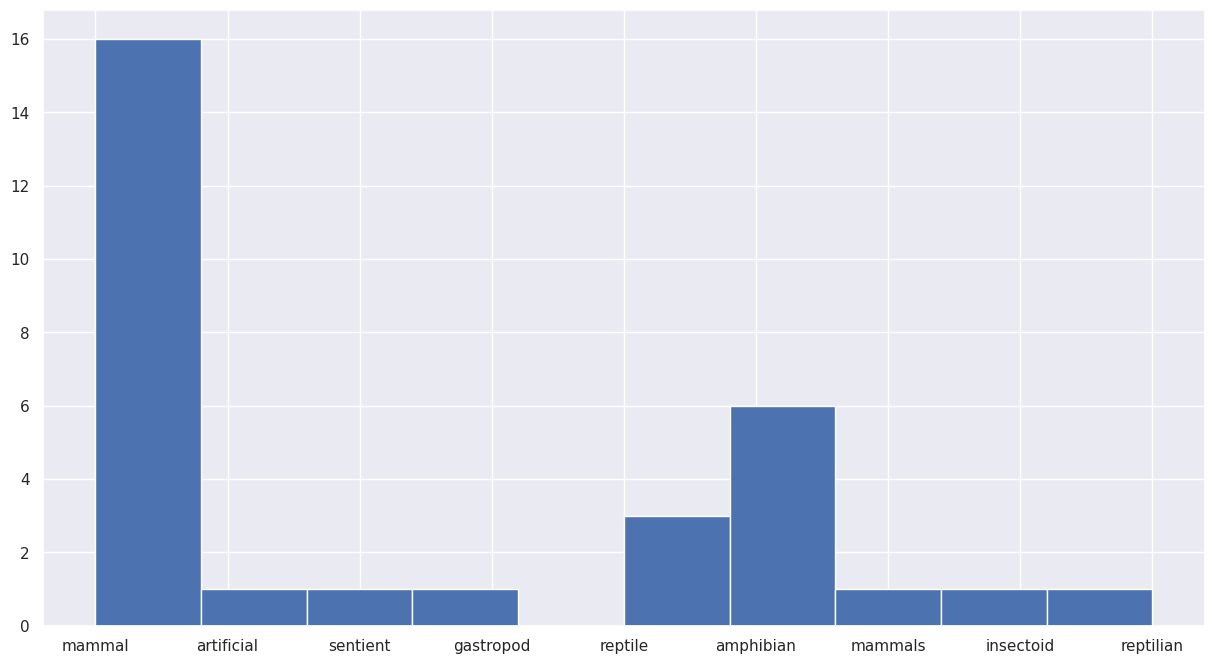

In [155]:
species_df['classification'].hist()
plt.hist()

Obviously species that presented here, mammal are overrepresented with 16 appartion followed by amphibian

## Vehicles

In [156]:
# Scraping all vehi
vehicles_df = get_full_type_data('http://swapi.dev/api/vehicles/')
print("Number of vehicles",vehicles_df.shape[0])

Number of vehicles 39


In [157]:
vehicles_df.to_csv("vehicles.csv",index=False)# Save data, so do not need to fetch data a second time

In [158]:
#Next time, just run this
vehicles_df = pd.read_csv("vehicles.csv")

## Starships

In [188]:
# Scraping all attributes of starships 

starships_df = get_full_type_data('http://swapi.dev/api/starships/')

print("Number of starships",starships_df.shape[0])

Number of starships 36


In [189]:
#Exporting of data to csv format

starships_df.to_csv('starships.csv',index=False)

In [217]:
#Reading of data from a saved csv file

starships_df=pd.read_csv('starships.csv')

# Drop not useful columns from our data

starships_df=starships_df.drop(columns=['created','edited','url'])

In [218]:
starships_df.head(2)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"['https://swapi.dev/api/films/1/', 'https://sw..."
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",NaN,36000000,2 years,2.0,60,Star Destroyer,[],"['https://swapi.dev/api/films/1/', 'https://sw..."
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],['https://swapi.dev/api/films/1/']
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,NaN,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],['https://swapi.dev/api/films/1/']
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"['https://swapi.dev/api/people/13/', 'https://...","['https://swapi.dev/api/films/1/', 'https://sw..."


In [220]:
starships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    36 non-null     object
 1   model                   36 non-null     object
 2   manufacturer            36 non-null     object
 3   cost_in_credits         26 non-null     object
 4   length                  36 non-null     object
 5   max_atmosphering_speed  29 non-null     object
 6   crew                    35 non-null     object
 7   passengers              32 non-null     object
 8   cargo_capacity          29 non-null     object
 9   consumables             31 non-null     object
 10  hyperdrive_rating       35 non-null     object
 11  MGLT                    17 non-null     object
 12  starship_class          36 non-null     object
 13  pilots                  36 non-null     object
 14  films                   36 non-null     object
dtypes: objec

In [219]:
# Replacing 'unknown' by NaN to facilitate interaction and conversion of our dataframe and also NaN is
# handled in most of python functions

starships_df=starships_df.replace('unknown',np.NaN)

# Familiarising with size of NaN per columns of data

missing_values_table(starships_df)

Your selected stage_dataframe has 15 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
MGLT,19,52.8
cost_in_credits,10,27.8
max_atmosphering_speed,7,19.4
cargo_capacity,7,19.4
consumables,5,13.9
passengers,4,11.1
crew,1,2.8
hyperdrive_rating,1,2.8


In [225]:
num_cols=['cost_in_credits','length','max_atmosphering_speed','crew','cargo_capacity','passengers','hyperdrive_rating','MGLT']
for col in num_cols:
    # For all columns in numeric vars list we featured them to right structure
     #-I find that separator is "," inplace of "."
     #- '-' between numbers that is supposed to unique number
     #- 'km' in number, need to fix that to allow conversion
    
    starships_df[col]=starships_df[col].apply(lambda x: str(x).replace(',','.'))
    starships_df[col]=starships_df[col].apply(lambda x: str(x).replace('-',''))
    starships_df[col]=starships_df[col].apply(lambda x: str(x).replace('km',' '))

In [231]:
# Converting all numerics columns in right data type for displaying some statistics

starships_df[num_cols]=starships_df[num_cols].astype('float')

starships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    36 non-null     object 
 1   model                   36 non-null     object 
 2   manufacturer            36 non-null     object 
 3   cost_in_credits         26 non-null     float64
 4   length                  36 non-null     float64
 5   max_atmosphering_speed  29 non-null     float64
 6   crew                    35 non-null     float64
 7   passengers              32 non-null     float64
 8   cargo_capacity          29 non-null     float64
 9   consumables             31 non-null     object 
 10  hyperdrive_rating       35 non-null     float64
 11  MGLT                    17 non-null     float64
 12  starship_class          36 non-null     object 
 13  pilots                  36 non-null     object 
 14  films                   36 non-null     obje

In [227]:
#This functions give a quick statistics descriptive values 

starships_df.describe()

,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,hyperdrive_rating,MGLT
count,2.600000e+01,36.000000,29.000000,35.000000,32.000000,2.900000e+01,35.000000,17.000000
mean,3.852734e+10,4130.570833,1356.896552,1321.061629,8632.010688,3.463580e+10,1.585714,67.705882
std,1.961028e+11,20115.591586,1313.952199,5242.959287,26561.513124,1.856674e+11,1.139438,30.209197
min,3.570000e+04,1.600000,650.000000,1.000000,0.000000,4.000000e+01,0.500000,10.000000
25%,1.697500e+05,13.625000,975.000000,1.000000,0.000000,1.100000e+02,1.000000,50.000000
50%,2.800000e+05,31.785000,1050.000000,5.000000,10.500000,8.000000e+04,1.000000,70.000000
75%,5.650000e+07,322.500000,1180.000000,187.500000,660.835500,1.900000e+07,2.000000,91.000000
max,1.000000e+12,120000.000000,8000.000000,30165.000000,139000.000000,1.000000e+12,6.000000,120.000000


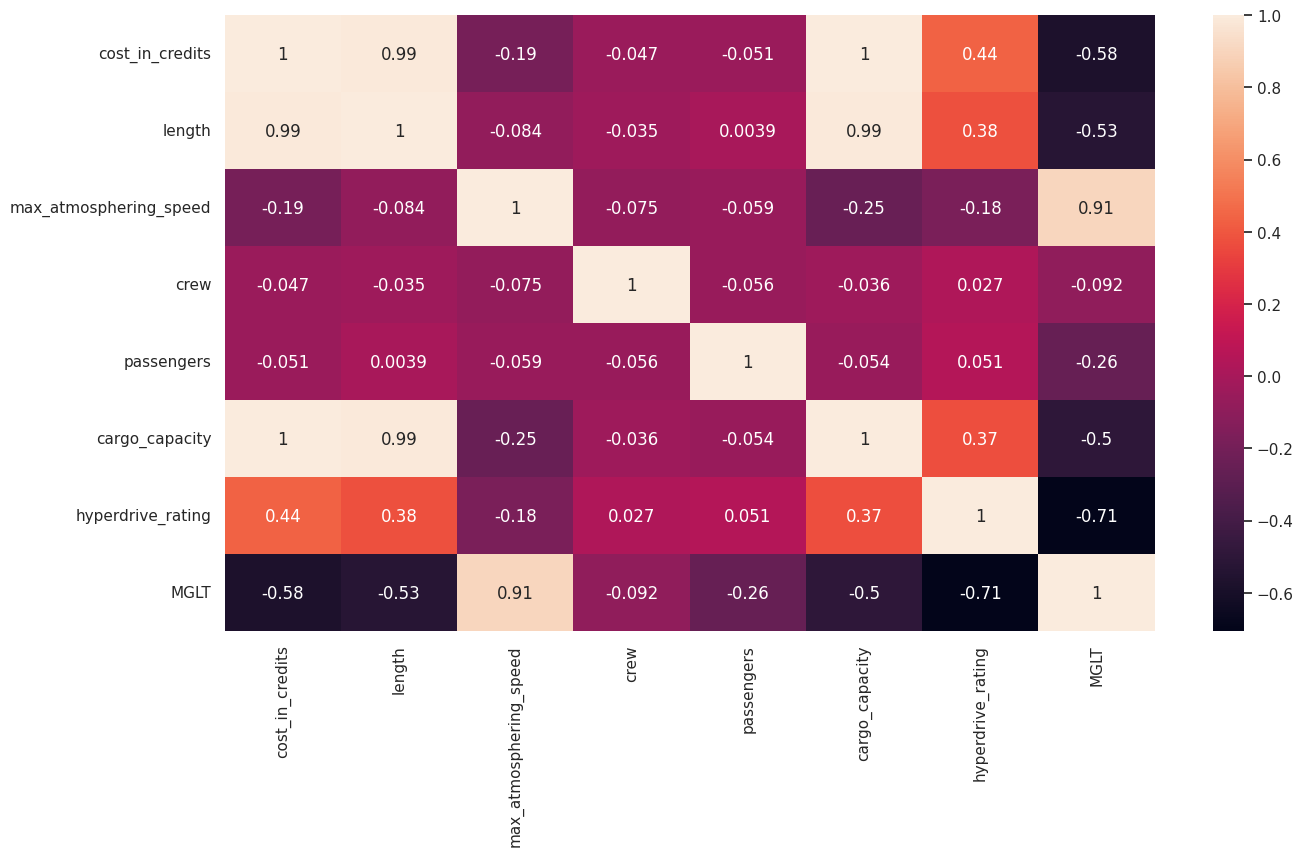

In [230]:
corr_star=starships_df.corr()


sns.heatmap(corr_star,annot=True)

plt.show()

By reading this table, we can find that some variables have strong relationship and other no. For postive relationship:
    
    - length, cost in credits and cargo capcity are strongly positive correlated.
    - max_atmosphere_speed and MGLT are more correlated also by 0.91
    - But more MGLT grow up hyperdrive_ratio decrease
    - ...

Here let's try something that needs information from more than 1 datasets

Let's try to see if height is related to the planet's gravity. This would requires data from both planets and people datasets.

In [88]:
# Data featuring

planets_with_gravity = planets_df[planets_df['gravity'].apply(lambda x: remove_none(x))]

def get_gravity_num(x):

    if x[-8:]=='standard':
        
        gravity_num = float(x[:-8])
    
    elif x =='1.5 (surface), 1 standard (Cloud City)':
        
        gravity_num = 1.5
    
    else:
        
        gravity_num = float(x)
    
    return gravity_num

planets_with_gravity['gravity_num'] = planets_with_gravity['gravity'].apply(lambda x: get_gravity_num(x))

planets_with_gravity.head(3)

C:\Users\Qing\AppData\Local\Temp\ipykernel_7548\3118029160.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planets_with_gravity['gravity_num'] = planets_with_gravity['gravity'].apply(lambda x: get_gravity_num(x))


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url,gravity_num
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/,1.0
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/,1.0
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/,1.0


In [94]:
gravity_map = dict(zip(planets_with_gravity.url, planets_with_gravity.gravity_num))
gravity_map

{'https://swapi.dev/api/planets/1/': 1.0,
 'https://swapi.dev/api/planets/2/': 1.0,
 'https://swapi.dev/api/planets/3/': 1.0,
 'https://swapi.dev/api/planets/4/': 1.1,
 'https://swapi.dev/api/planets/6/': 1.5,
 'https://swapi.dev/api/planets/7/': 0.85,
 'https://swapi.dev/api/planets/8/': 1.0,
 'https://swapi.dev/api/planets/9/': 1.0,
 'https://swapi.dev/api/planets/10/': 1.0,
 'https://swapi.dev/api/planets/11/': 0.9,
 'https://swapi.dev/api/planets/12/': 1.0,
 'https://swapi.dev/api/planets/13/': 1.0,
 'https://swapi.dev/api/planets/14/': 1.0,
 'https://swapi.dev/api/planets/15/': 0.56,
 'https://swapi.dev/api/planets/16/': 1.0,
 'https://swapi.dev/api/planets/17/': 0.75,
 'https://swapi.dev/api/planets/18/': 1.0,
 'https://swapi.dev/api/planets/20/': 1.0,
 'https://swapi.dev/api/planets/21/': 1.0,
 'https://swapi.dev/api/planets/22/': 1.0,
 'https://swapi.dev/api/planets/23/': 1.0,
 'https://swapi.dev/api/planets/24/': 1.0,
 'https://swapi.dev/api/planets/25/': 1.0,
 'https://swapi.

In [98]:
people['gravity_num'] = people['homeworld'].map(gravity_map,na_action='ignore')

people.head(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,...,edited,url,film_num,vehicles_num,starships_num,with_gender,bmi,too_thin,health,gravity_num
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",...,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,4,2,2,True,26.027582,False,too_fat,1.0
1,C-3PO,167.0,75.0,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",...,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,6,0,0,False,26.892323,False,too_fat,1.0
2,R2-D2,96.0,32.0,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",...,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,6,0,0,False,34.722222,False,too_fat,1.0


In [103]:
people[['height','gravity_num']].corr()

,height,gravity_num
height,1.000000,-0.144998
gravity_num,-0.144998,1.000000


The correlation verifies our hypothesis. Lower gravity, the taller the people 